In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
pylab.rcParams['figure.figsize'] = (4.0, 2.)
pylab.rcParams['lines.linewidth'] = 1.0
pylab.rcParams['font.size'] = 12.0
pylab.rcParams['axes.linewidth'] = 1
pylab.rcParams['axes.titlesize'] = '14' 
pylab.rcParams['axes.labelsize'] = '10'
pylab.rcParams['axes.linewidth'] = 1
pylab.rcParams['figure.subplot.wspace'] = 0.5

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm
from sklearn import mixture
from sklearn.cluster import MeanShift
from sklearn.decomposition import PCA
import itertools
from scipy import linalg
import matplotlib as mpl
import h5py

from detect import detectData
from localisation import localisation, amps, filteredSpikes

Populating the interactive namespace from numpy and matplotlib


In [2]:
import socket
if socket.gethostname() == 'dialga':
    data_path = '../rawDataSampleLarge.h5'
else:
    data_path = '/Users/josh/Project/data/rawDataSampleLarge.h5'
data = h5py.File(data_path, 'r')


In [3]:
# detectData(d, rawfilename, sfd, nDumpFrames, thres, maa = None, maxsl = None, minsl = None, ahpthr = None):

# MinAvgAmp minimal avg. amplitude of peak (in units of Qd)
# MaxSl dead time in frames after peak, used for further testing
# MinSl length considered for determining avg. spike amplitude
# AHPthr signal should go below that threshold within MaxSl-Slmin frames
# def detectData(data, spikefilename, shapefilename, sfd, thres, maa = None, maxsl = None, minsl = None, ahpthr = None):

# Matthias was using threshold 8
detectData(data_path, 'spikes', 'shapes', 30000, 20, maa=0, maxsl=12, minsl=3, ahpthr=0)
# detectData(data_path, 'spikes', 'shapes', 30000, 8)

(385, 1800000)
# Sampling rate: 30000
# Number of recorded channels: 385
# Analysing frames: 1800000, Seconds:60
tInc:100000
Analysing 100000 frames; -22 100009
t0 = 0, t1 = 100000
(385, 100009)
Analysing 100000 frames; 99978 200009
t0 = 100000, t1 = 200000
((385, 100031), 38511935)
Analysing 100000 frames; 199978 300009
t0 = 200000, t1 = 300000
((385, 100031), 38511935)
Analysing 100000 frames; 299978 400009
t0 = 300000, t1 = 400000
((385, 100031), 38511935)
Analysing 100000 frames; 399978 500009
t0 = 400000, t1 = 500000
((385, 100031), 38511935)
Analysing 100000 frames; 499978 600009
t0 = 500000, t1 = 600000
((385, 100031), 38511935)
Analysing 100000 frames; 599978 700009
t0 = 600000, t1 = 700000
((385, 100031), 38511935)
Analysing 100000 frames; 699978 800009
t0 = 700000, t1 = 800000
((385, 100031), 38511935)
Analysing 100000 frames; 799978 900009
t0 = 800000, t1 = 900000
((385, 100031), 38511935)
Analysing 100000 frames; 899978 1000009
t0 = 900000, t1 = 1000000
((385, 100031), 3851

(341288, 3)


<IPython.core.display.Javascript object>


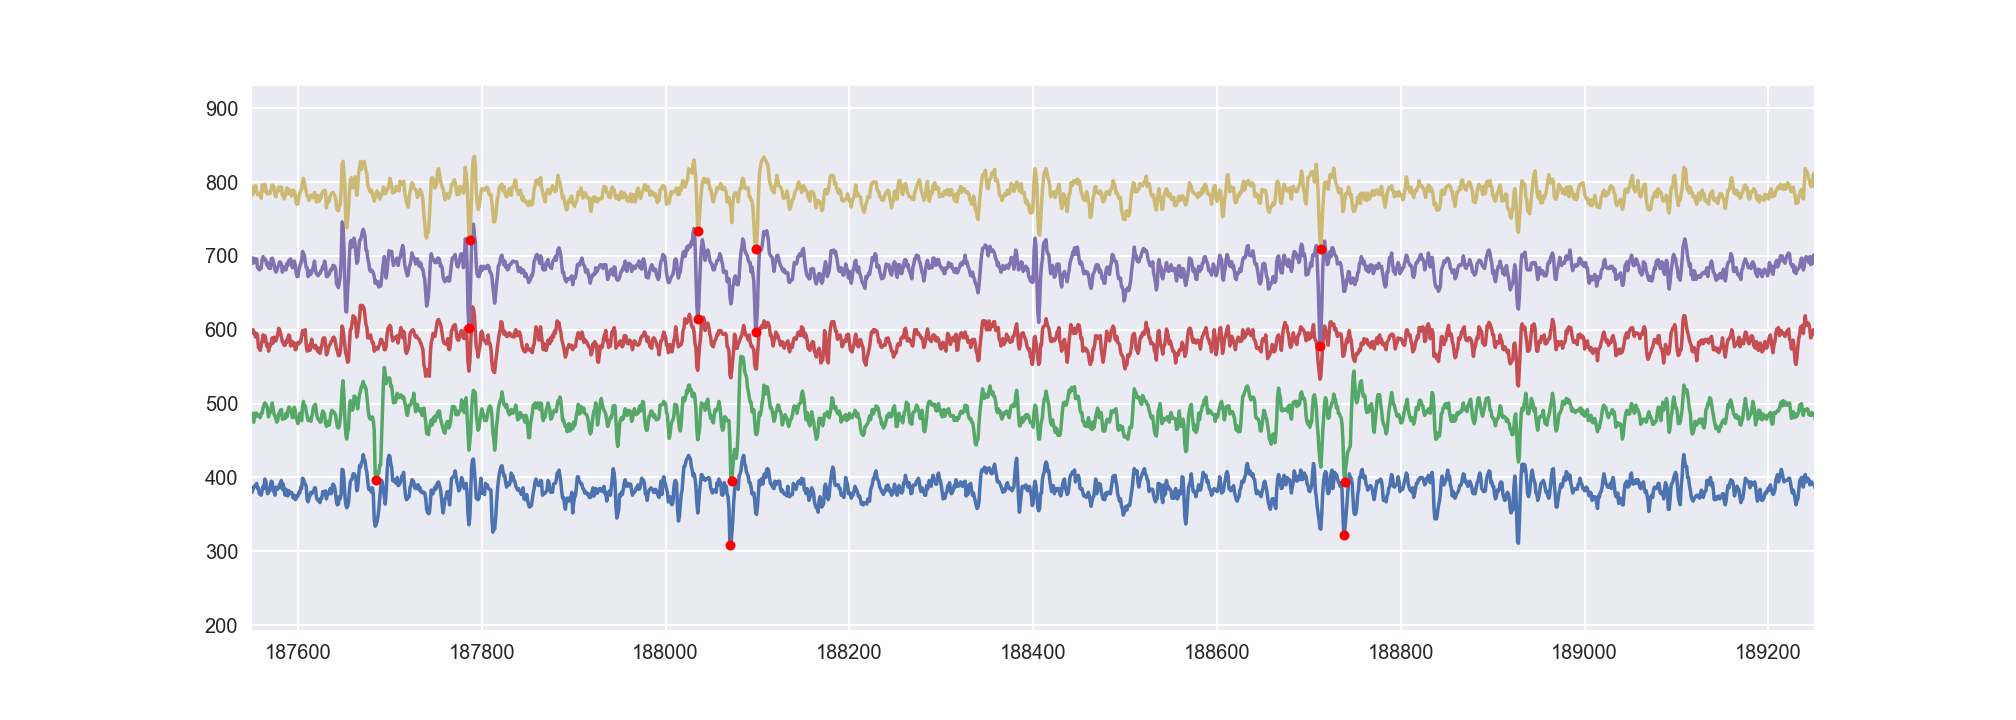

(187550, 189250)

In [4]:
%matplotlib notebook
sp = np.loadtxt('spikes')
print(sp.shape)
plt.figure(figsize=(14,5))
for i, channel in enumerate(range(0,5)):
    d = data['Raw'][channel,:]
    plt.plot(d+i*100)
    inds = np.where(sp[:,0]==channel)[0]
    plt.plot(sp[inds,1], d[sp[inds,1].astype(int)]+i*100,'r.',ms=10)
plt.xlim((187550,189250))

In [5]:
# plot individual shapes, remove baseline (now stored in shape file at position 4)

<IPython.core.display.Javascript object>


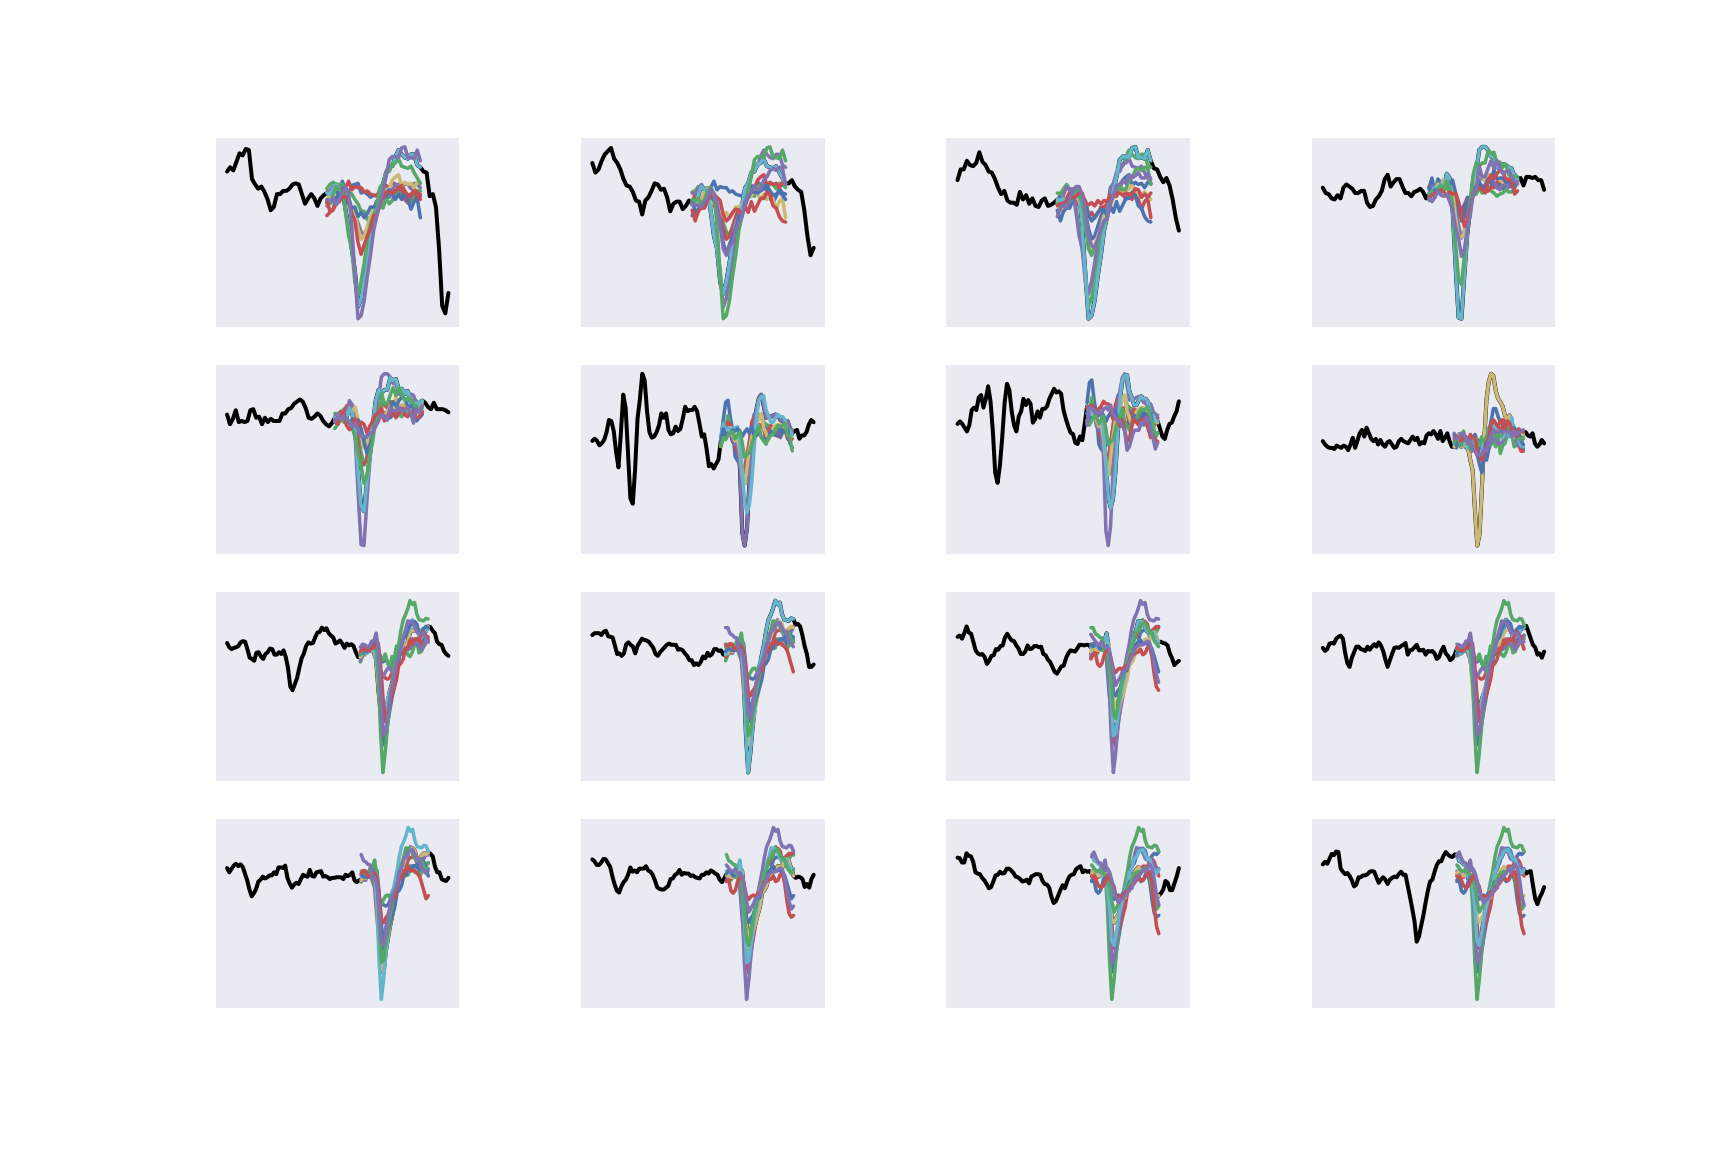

(333, 42, 1016, 32, 383)
(335, 42, 842, 32, 383)
(337, 42, 1141, 32, 383)
(93, 46, 1210, 32, 383)
(95, 47, 848, 32, 383)
(3, 64, 958, 25, 382)
(5, 65, 669, 32, 382)
(142, 67, 926, 32, 382)
(326, 69, 1053, 32, 382)
(329, 69, 1962, 32, 382)
(331, 69, 1346, 32, 382)
(327, 70, 890, 32, 382)
(328, 70, 1530, 32, 382)
(330, 70, 1114, 32, 382)
(332, 70, 689, 32, 382)
(333, 70, 1059, 32, 382)


In [5]:
plt.figure(figsize=(12,8))
f = open('shapes')
for i in range(16):
    plt.subplot(4,4,i+1)
    l = f.readline()
    line = l.split()
    ch = int(line[0])
    frame = int(line[1])
    amp = int(line[2])
    b = int(line[3])
    cutout = np.array(line[4:], dtype=int)
    d = data['Raw'][ch,:]
    plt.plot(d[:frame+30]-b, 'k', lw=2)
    for i in range(int(len(cutout)/32)):
        plt.plot(np.arange(frame-10, frame+21), cutout[i*32+1:(i+1)*32]-b, label=cutout[i*32])
#     plt.legend()
    plt.xticks(())
    plt.yticks(())
    print(ch, frame, amp, len(cutout)/10, b)
f.close()

In [2]:
filteredSpikes('shapes')

('Number of filtered spikes =', 148756)


In [2]:
localisation('filtered_shapes','chpos.npy', medians = True, clen = 32)

('count2 =', 242)
('empty string =', 10)


In [3]:
ls = np.loadtxt('local_spikes')
ls.shape

(148756, 2)

<IPython.core.display.Javascript object>


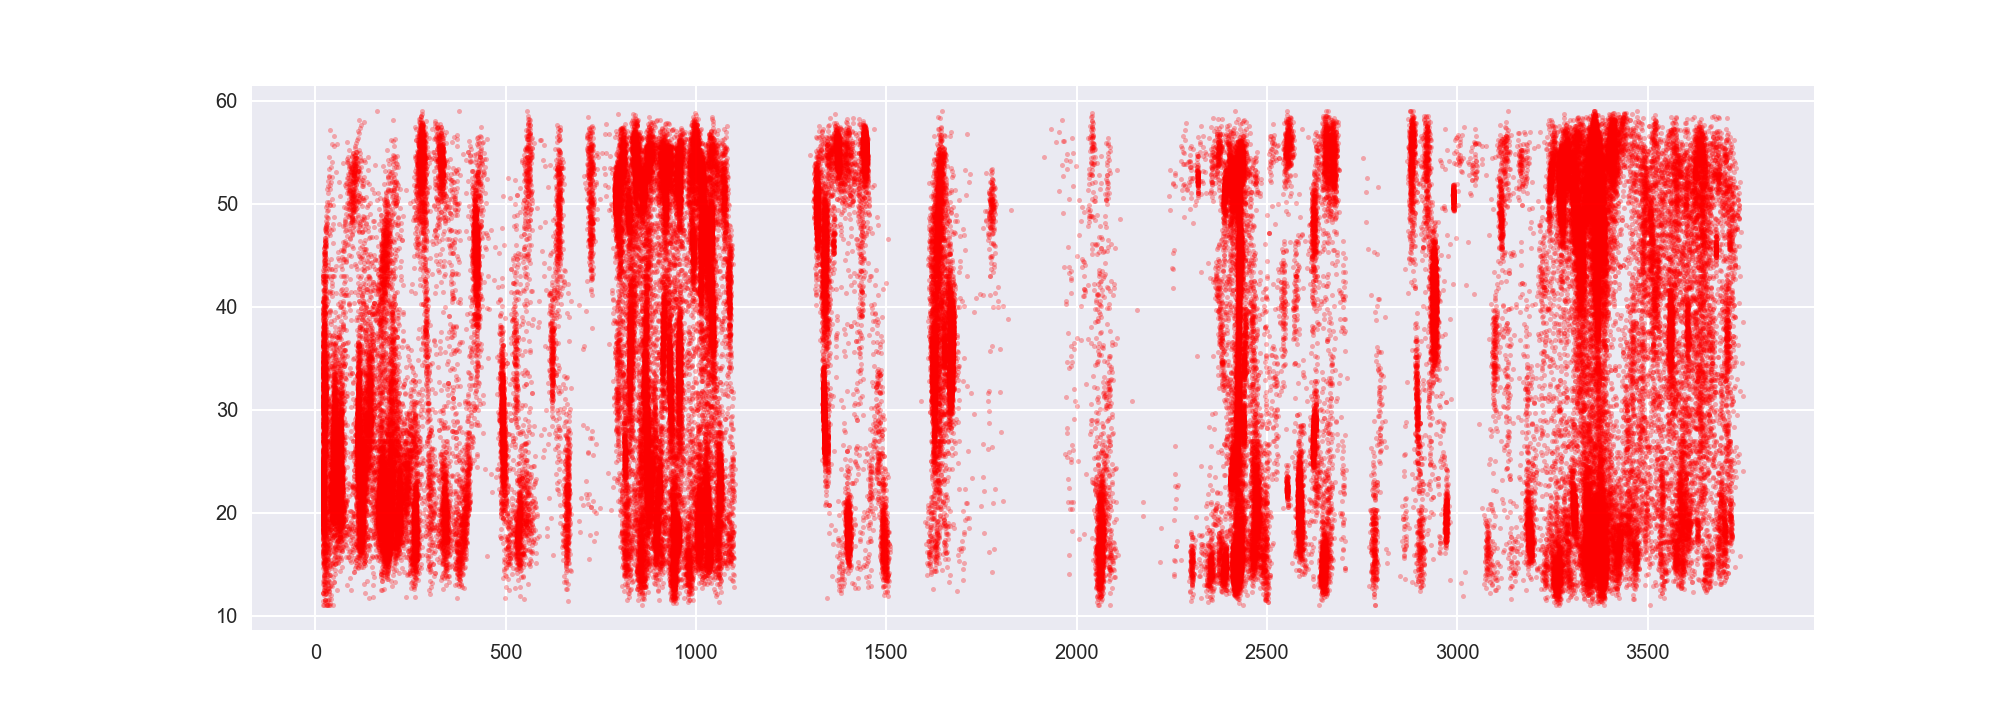

In [4]:
%matplotlib notebook
plt.figure(figsize=(14,5))
plt.plot(ls[:,0], ls[:,1],'r.',ms=5, alpha=0.3)

<IPython.core.display.Javascript object>


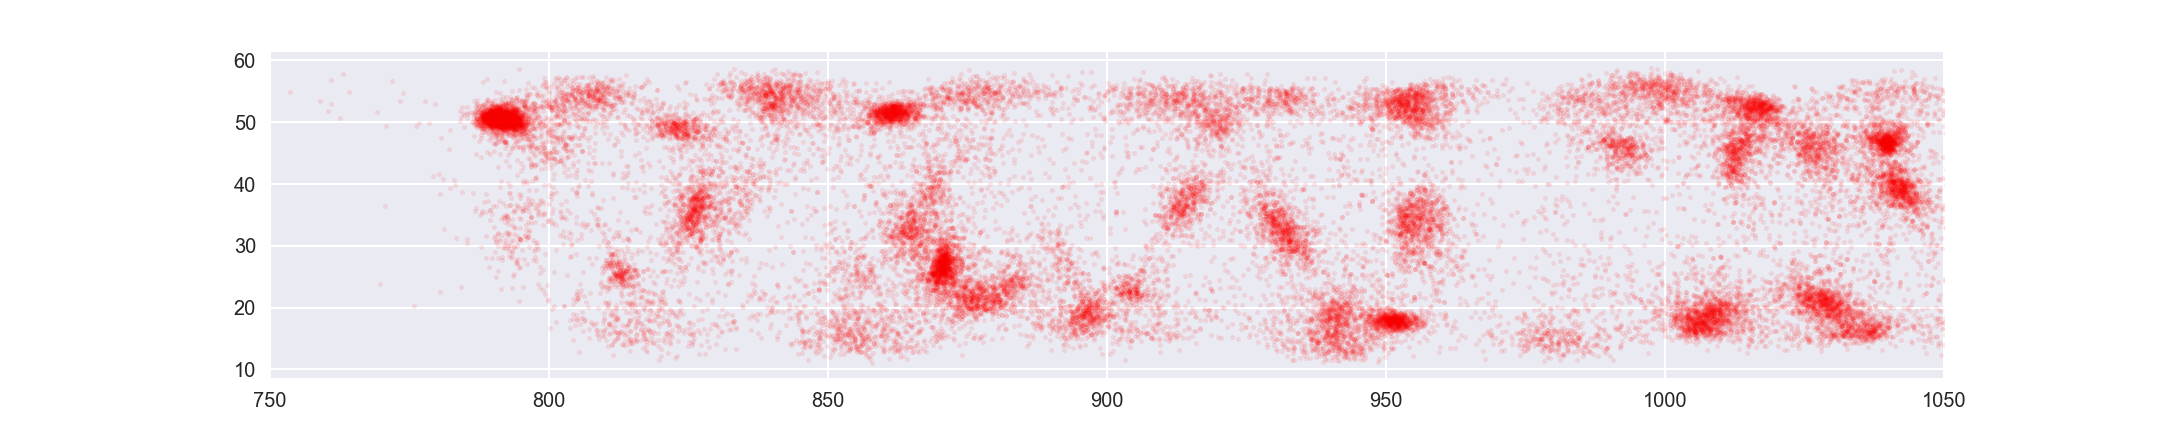

(750, 1050)

In [5]:
%matplotlib notebook
plt.figure(figsize=(15,3))
plt.plot(ls[:,0], ls[:,1],'r.',ms=5, alpha=0.1)
plt.xlim([750,1050])

<IPython.core.display.Javascript object>


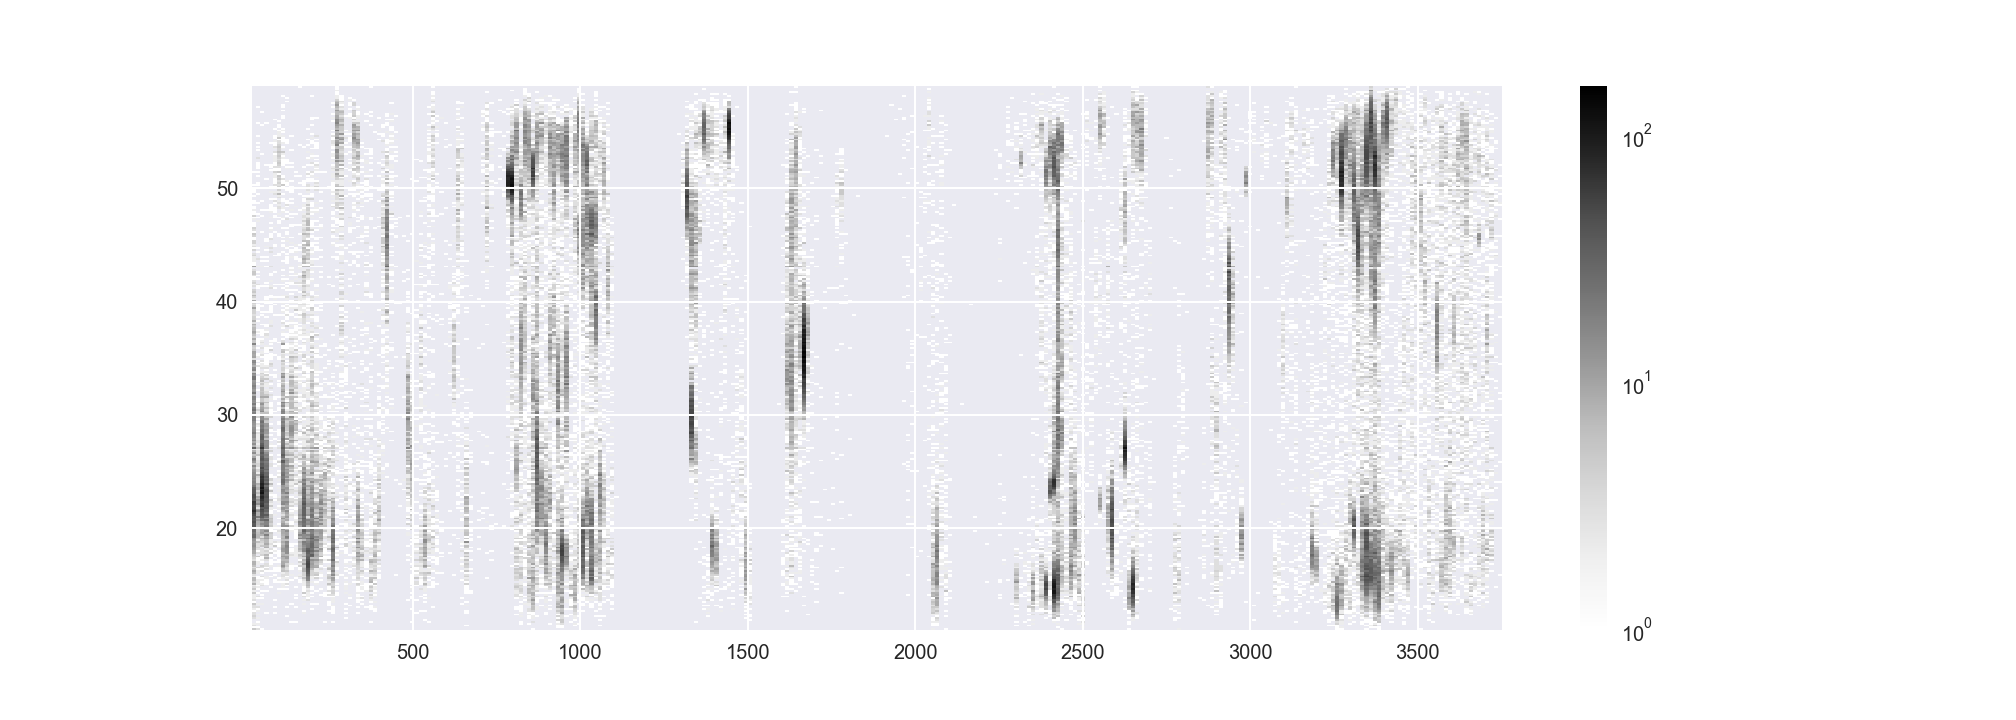

In [6]:
%matplotlib notebook
plt.figure(figsize=(14,5))
plt.hist2d(ls[:,0], ls[:,1], bins=300, norm=LogNorm())
plt.colorbar()

In [8]:
n = len(ls)
n

148756

In [9]:
ms = MeanShift(bandwidth = 8, bin_seeding=True, min_bin_freq=10, n_jobs=-1)
ms.fit(ls)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
# print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

('Number of estimated clusters:', 206)


<IPython.core.display.Javascript object>


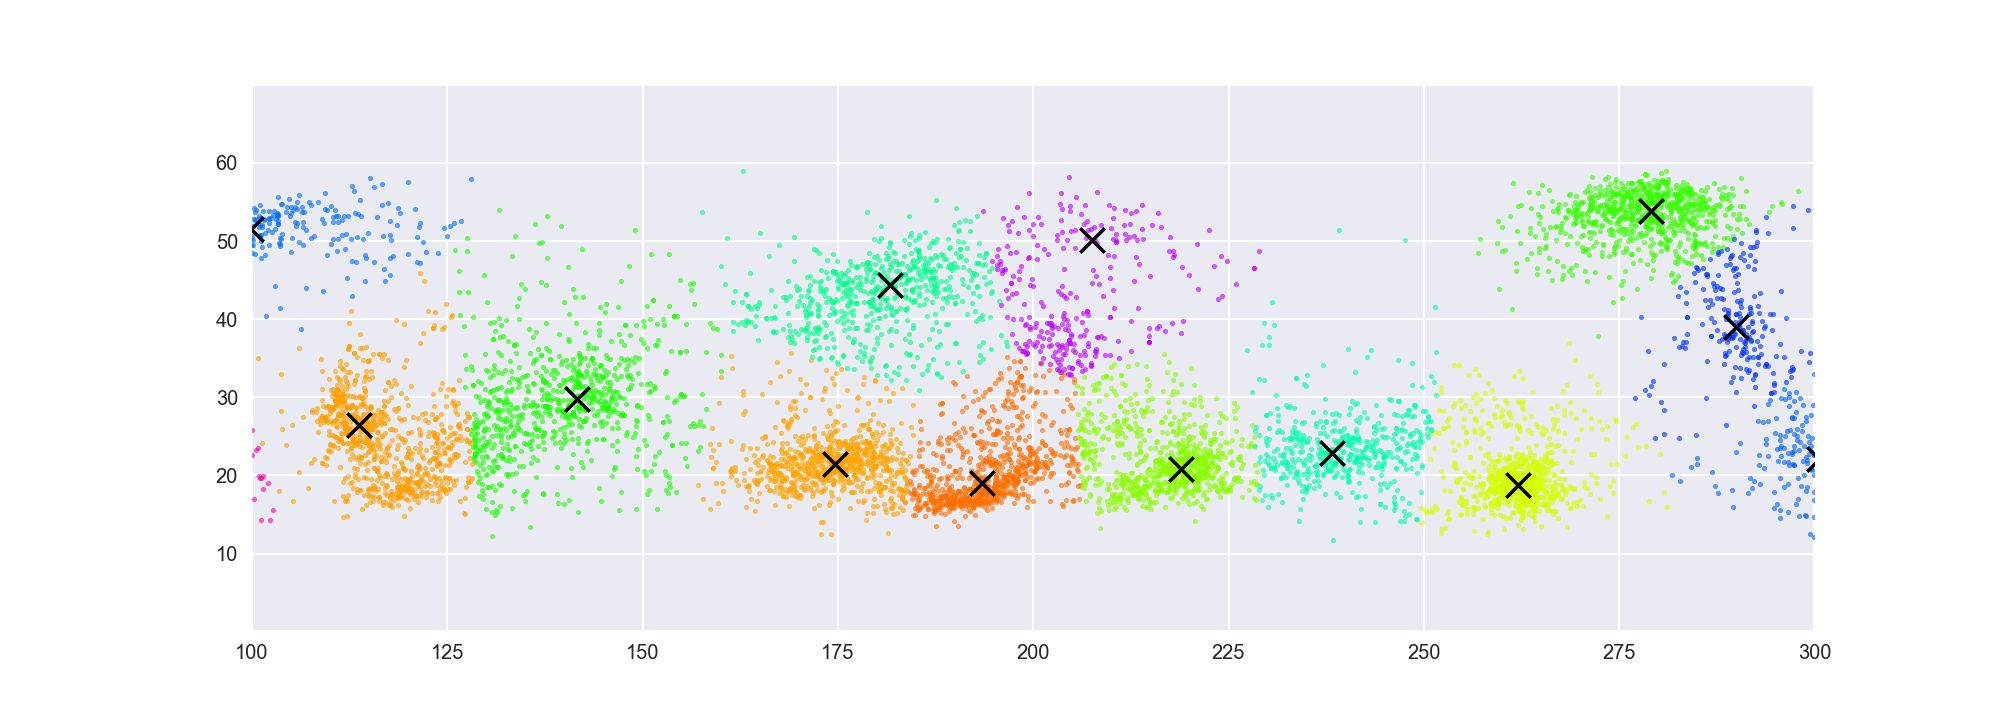

(100, 300)

In [10]:
plt.figure(figsize=(14,5))
# colors = 100*['r', 'g', 'b', 'c', 'k', 'y', 'm']
colors = plt.cm.hsv(1.*np.arange(n_clusters_)/n_clusters_)

for cl in np.unique(labels):
    inds = np.where(labels==cl)[0][:800]
    plt.scatter(ls[inds,0], ls[inds,1], marker='.', color = colors[cl],s=20, alpha=0.6)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="x", color ='k', s=150, linewidths = 5, zorder=10)
plt.axis('equal')
plt.xlim((100,300))


In [12]:
cutouts = np.loadtxt('pca_cutouts', dtype=float, delimiter=' ' )
cutouts.shape, ls.shape

((148746, 31), (148756, 2))

<IPython.core.display.Javascript object>


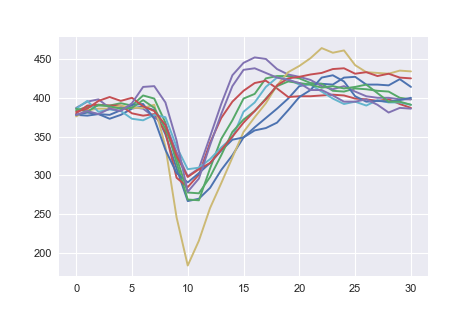

In [44]:
%matplotlib notebook
for i in range(10):
    plt.plot(np.arange(31), cutouts[i])

In [45]:
pca = PCA(n_components=2, whiten=True)
cutouts_pca = pca.fit_transform(cutouts)
cutouts_pca.shape

(148756, 2)

<IPython.core.display.Javascript object>


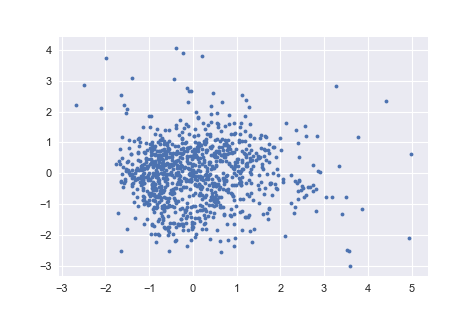

In [46]:
plt.figure()
plt.plot(cutouts_pca[:1000,0], cutouts_pca[:1000,1],'.')

In [47]:
fourvec = np.hstack((ls, 20*cutouts_pca))

In [48]:
fourvec.shape

(148756, 4)

In [49]:
ms = MeanShift(bandwidth = 8, bin_seeding=True, min_bin_freq=10, n_jobs=-1)
ms.fit(fourvec)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
# print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

total number of seeds: 2901
seeds/job: 726
using 4 cpus


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   10.9s finished


Number of estimated clusters: 252


<IPython.core.display.Javascript object>


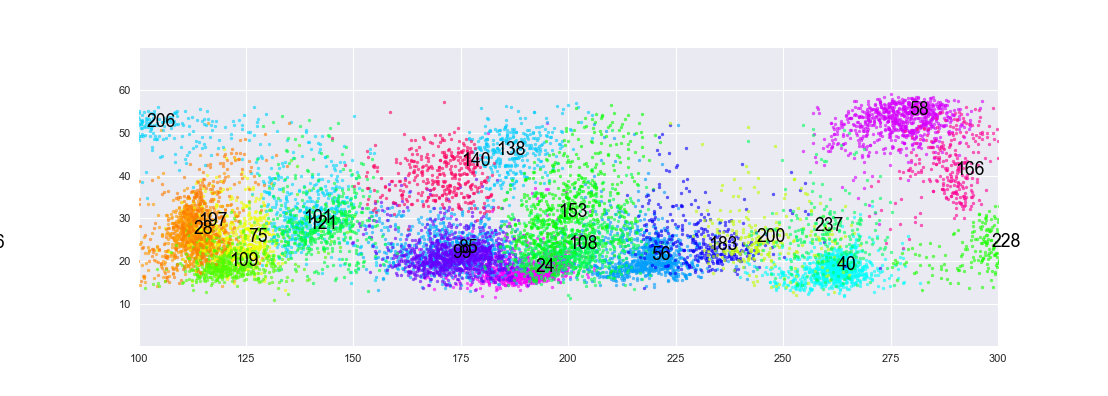

(100, 300)

In [71]:
plt.figure(figsize=(14,5))
# colors = 100*['r', 'g', 'b', 'c', 'k', 'y', 'm']
colors = plt.cm.hsv(1.*np.random.permutation(n_clusters_)/n_clusters_)

for cl in np.unique(labels):
    inds = np.where(labels==cl)[0][:1000]
    plt.scatter(ls[inds,0], ls[inds,1], marker='.', color = colors[cl],s=30, alpha=0.6)
    plt.text(cluster_centers[cl,0], cluster_centers[cl,1], str(cl), color='k', fontsize=16)

# plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="x", color ='k', s=150, linewidths = 5, zorder=10)
plt.axis('equal')
plt.xlim((100,300))

<IPython.core.display.Javascript object>


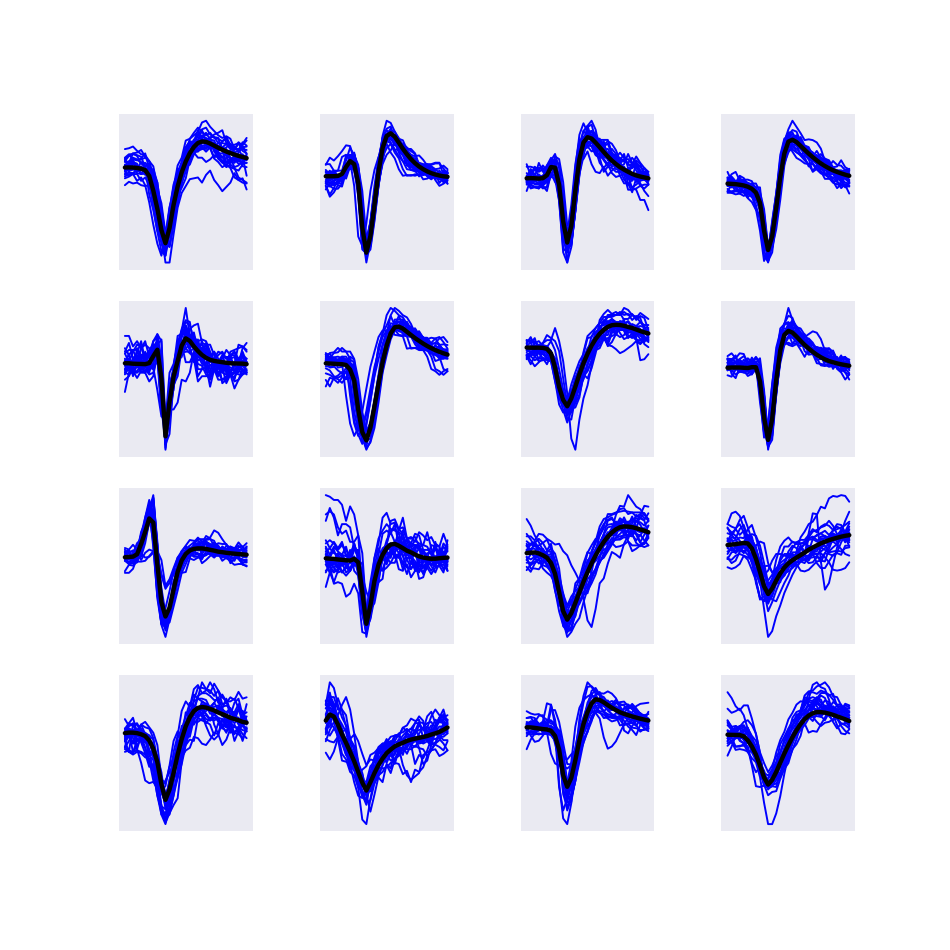

In [61]:
plt.figure(figsize=(12,12))
for cl in range(16):
    plt.subplot(4,4,cl+1)
    inds = np.where(labels==cl)[0]
    plt.plot(cutouts[inds[:20],:].T,'b');
    plt.plot(np.mean(cutouts[inds,:],axis=0),'k', lw=4);
    plt.xticks(())
    plt.yticks(())